In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# plt.rcParams['figure.figsize'] = [20, 10]

In [53]:
from dataclasses import make_dataclass


Point = make_dataclass("Point", [("CPU", str), ("std_CTR", float), ("std_GCM_Seal", float), ("aesctrat_slow", float), ("aesctrat_fast", float)])
df = pd.DataFrame([
    Point("amd64-epyc", 421.19, 2829.11, 470.17, 5443.96), 
    Point("amd64-ryzen5", 906.12, 4302.75, 649.95, 6119.56), 
    Point("arm64-ec2-t4g-small", 865.65, 1698.73, 341.89, 2313.64),
    Point("arm64-darwin-m1", 1929.33, 6546.48, 768.86, 7285.88)
])

df_sparse = df[['CPU', 'std_CTR', 'aesctrat_fast']]

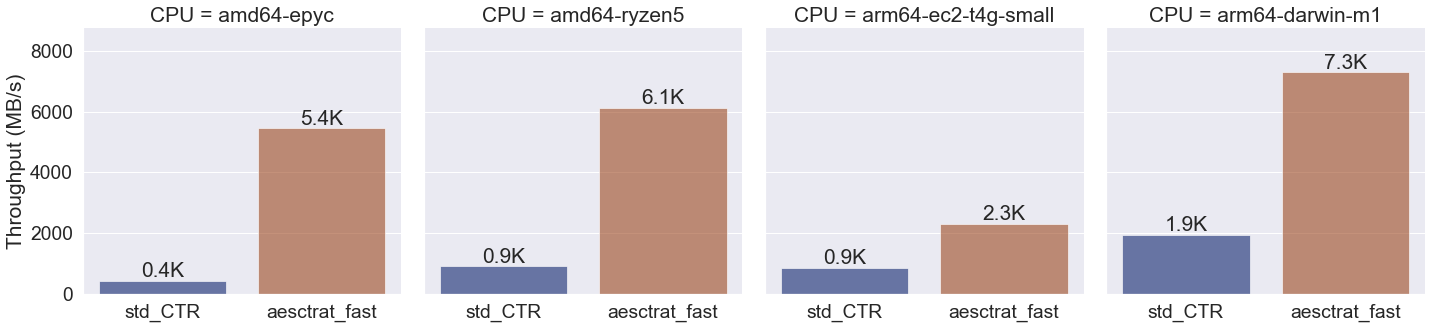

In [101]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.75)

# Draw a nested barplot by CPU type
g = sns.catplot(
    data=df_sparse, 
    kind="bar",
    col="CPU",
    dodge=False,
    # facet_kws={'gridspec_kws': {'wspace': 0.1}},
    # ci="sd",
    palette="dark",
    alpha=.6,
    # height=6
)
# g.despine(left=True)
g.set_axis_labels("", "Throughput (MB/s)")
# g.fig.subplots_adjust(top=1, right=0.1)  
# g.legend.set_title("AES encryption throughput (megabytes per second)")
# g._figure.set_tight_layout(True)

# iterate through axes
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)